# Clustering espectral


# Teoría


## Descripción

El **objetivo** de un algoritmo de **agrupamiento espectral** podría replantearse como **la búsqueda de un grupo de subconjuntos de nodos** (que, en nuestro caso, representan ejemplos del conjunto de entrenamiento) **tal que la probabilidad de transitar entre ellos sea mínima.**

Las técnicas de **agrupamiento espectral (spectral clustering en inglés),** transforman el conjunto de datos de entrenamiento y lo representan en espacios alternativos donde se simplifica la **identificación de los distintos clústeres sea cual sea su forma.**

<img src= 'img/espectral_clustering_01.png'>

## Los tres pasos del espectral clustering

Un algoritmo de agrupamiento espectral suele constar, a grandes rasgos, de 4 pasos:

1. Se construye un **grafo de similitudes**, donde cada nodo es un ejemplo de entrenamiento, el cual se une, mediante arcos, a los **nodos con mayor similitud. Hay varios criterios para construir  el grafo:** **método del umbral o KNN**.El grafo se construye a partir de la matriz  de adyacencia, 
2. Se obtiene **la matriz laplaciana**
3. Usando los **vectores propios de la matriz laplaciana**, los ejemplos son transformados a otro **espacio de baja dimensionalidad donde los clústeres se hacen más evidentes**.
4. Se **aplica un algoritmo tradicional de agrupamiento** (por ejemplo, K-means) sobre los datos en este nuevo espacio.

### PASO1 ----> Matriz adyacencia, y grafo de similitudes:

#### Matriz de adjacencia

Primero se construye la **matriz de adyacencias**, entre casos M, con n filas y columnas (cuadrada), donde cada celda guarda la distancia entre en el ejemplo $x_i$ y el ejemplo $x_j$. **Los elementos de la diagonal principal de la matriz de adyacencia son 0** (distancia entre un vector y él mismo) y el resto son valores no negativos.

Una **matriz de similitud** es equivalente a una matriz de distancias o disimilitud, tal y como se define anteriormente, con una única diferencia: cada celda define la similitud entre dos ejemplos (y no la distancia o disimilitud). Así, la matriz de similitud $S$ es una matriz cuadrada con $n$ filas y columnas donde cada celda $S_{ij}$ guarda la similitud entre los ejemplos $x_i$y $x_j$. Las celdas de la diagonal principal tienen valor 1 (máxima similitud).

Dependiendo del método que se utilize la matriz puede ser simétrica  o no (KNN por ejemplo no es simétrica).

#### Grafo de similitudes

Partiendo de la matriz de similitud $S$ existen diferentes estrategias para crear un grafo de similitud; grafo de no dirigido $(V, E)$ donde cada vertice es cada ejemplo de los datos y las aristas (líneas) represenan la distancia o similitud (euclidea, manhatan, etc ) entre los ejemplos de entrenamiento.


##### Grafo completo: todos con todos

Una vez que V contiene un nodo por cada ejemplo de entrenamiento, todo par de nodos-ejemplos $(x_i, x_j)$ que tiene un valor positivo en la correspondiente celda de la matriz de similitud, $Sij > 0$, se une con un arco, $e_{ij} \subset E$.

- cada dato del entrenamiento es un nodo del grafo
- todos estan conectados con todos
- la matriz esta compuesta por la similitud de cada nodo $W_{ij} = S_{ij}$

<img src= 'img/Grafo_conpleto.png'>

##### Grafo umbral: 

Dado un valor umbral t de similitud mínima y el conjunto Vinicializado con un nodo por cada ejemplo de entrenamiento, todo par de nodos-ejemplos  que tiene un valor mayor que t en la correspondiente celda de la matriz de similitud, $S_{ij} > t$, se une con un arco, $e_{ij} \subset E$.

- Cada ejemplo del entrenamiento es un nodo del grafo.
- Existe una arista entre los nodos si hay un mínimo de similitud entre ambos $S_{ij} > t$.
- la matriz esta compuesta por la similitud de cada nodo $W_{ij} = S_{ij}$

<img src= 'img/Grafo_umbral.png'>

##### Grafo KNN: 

Dado un valor K (número de vecinos) y el conjunto V inicializado con un nodo por cada ejemplo de entrenamiento, se añade un arco, $e_{ij} \subset E$ , para todo par de nodos-ejemplos $(x_i, x_j)$ tal que xi es uno de los K vecinos más cercanos de $x_j$ o $x_j$ lo es de $x_i$.

En la práctica, esta es probablemente la técnica más habitual para obtener el grafo a partir de la matriz de similitud.

- Cada ejemplo del entrenamiento es un nodo del grafo.
- Un nodo i tiene una arista con otro nodo j si j es uno de los K vecinos más cercanos de i o viceversa.
- la matriz esta compuesta por la similitud de cada nodo $W_{ij} = S_{ij}$
- Esta matriz NO ES SIMÉTRICA. En la imagen estan destacados con línea gorda los ejemplos en los que ambos son vecino del otro, la línea fina, en cambio es cuando un ejemplo es vecino del otro pero no al revés.

<img src= 'img/Grafo_KNN.png'>


Para los siguientes datos: 

<img src= 'img/datos_espectr_clus_1.png'>

K-NN sobre el conjunto de datos con el uso de diferentes números de vecinos: 6, 9 y 12, de izquierda a derecha. 

<img src= 'img/mas_grafos_KNN.png'>

### PASO 2 ----> Matriz Laplaciana


Es necesario introducir el concepto de **matriz de pesos de los arcos, $W$**. En este caso, **cada celda toma como valor el peso del arco correspondiente, $w_{ij}$, y toma valor nulo si el arco no existe**, $e_{ij} \not\subset E \rightarrow W_{ij} = 0$. En un grafo, **el grado de un nodo se puede definir como el número de arcos que lo conectan** a otros nodos del grafo. 

En el caso de un grafo con pesos, como en este razonamiento, **el grado de un nodo es la suma de los pesos de los arcos que lo conectan** a otros nodos del grafo: 



$$d_i = \sum_{e_{ij}\subset E} {W_{ij}}$$



**$D$ se define como la matriz diagonal que tiene en cada elemento de su diagonal principal el grado de un nodo**, $g_i$. Dados $W y D$, definimos **la matriz laplaciana** de la siguiente forma:


Matriz laplaciana:

$$L = D - W$$

Matriz laplaciana normalizada:

$$L_{norm} = I - D^{-1}W$$

Matriz laplaciana normalizada simétrica:

$$L_{norm} = I - D^{-1/2}WD^{-1/2}$$

<img src= 'img/l_matrix.png'>


En resumen: 

- $W$ = matriz de pesos de los arcos

- $D$ = matriz diagonal de grados de nodos $d_i$

- $d_i$ = gradode un nodo: la suma los pesos de los arcos que lo conectan

- $I$ = matriz identidad


#### Propiedades de la matriz laplaciana

-  El número de valores propios iguales a 0 es igual al número de subconjuntos conectados (existe un camino en el grafo que une dos puntos cualesquiera del subconjunto).
- $L$ es simétrica $L = L^{-1}$ si usamos la versión simétrica de la matriz laplaciana (obviamente).
- Los eigenvalores de $L$ son reales no negativos.
- El segundo autovalor más pequeño es la conectividad del grafo (no nulo).

### PASO 3 ----> Transformación de los datos a un espacio de menor dimensionalidad

Consiste en **obtener los valores y vectores propios de la matriz laplaciana, que se ordenan por valor creciente de valor propio.** 

El primer valor y vector propio se obvia porque no aporta información (el vector propio es constante).

El algoritmo **selecciona los siguientes $m$ vectores propios, aquellos con los valores propios más pequeños**. Estos vectores propios se combinan formando una matriz $Z$ de tamaño $n * m$, que puede considerarse una transformación del conjunto de datos original. Se espera que esta transformación conduzca a una distribución del conjunto de datos en la que sea más sencillo separar los elementos de los diferentes clústeres.

Entonces este paso se divide en tres sub pasos:

1. Descomponer la matriz L en vectores propios
2. Ordenar los valores propios según el valor propio correspondiente, de manera ascendente.
3. Seleccionar los K primeros vectores propios

Para un grafo $G$ con $n$ nodos su adyacencia tiene $n$ eigenvalores $(u_1, u_2, ..., u_n)$ donde $u_1 >= u_2 >= ... >= u_n$,  con sus respecitvos eigenvectores (vectores propios) $ (x_1, x_2,...,  x_n)$.

El grafo laplaciano de $G$, $L_G$, tiene los siguientes eigenvalores $ (\lambda_1, \lambda_2,...,  \lambda_n)$ donde $\lambda_1 <=\lambda_2 <= ...<= \lambda_n)$.

Los eigenvalores revelan propiedades globales de un grafo que no son obvias en el mismo.

<img src= 'img\valores_propios.png'>

<img src= 'img\valores_propios_2.png'>

<img src= 'img\valores_propios_3.png'>

En estos casos, una técnica habitual consiste en **observar si en la ilustración de los valores propios más pequeños se encuentra un salto pronunciado entre dos valores consecutivos y establecer a partir de ello el valor de $m$**.


### PASO 4 ----> Se aplica un algoritmo de clustering tradicional Kmeans, Jerarquico, ...

Se aplica un algoritmo de agrupamiento tradicional con sus pros y sus contras de cada uno de ellos

# Práctica 

## Pseudocódigo del espectral clustering

1. Construir el grafo de similitud y calcular las matrices $W$ y $D$.
2. Obtener la matriz laplaciana no normalizada: $L = D – W$.
3. Obtener los $m$ vectores propios con menores valores propios y construir la matriz $Z$.
4. Aplicar un algoritmo tradicional de agrupamiento (como K-means) sobre $Z$ para identificar los $K$ clústeres.

## importando librerias

In [1]:
# !pip install networkx

In [2]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_circles                       # crear circulos
from sklearn.cluster import SpectralClustering, KMeans          # espectral clustering
from sklearn.metrics import pairwise_distances                  #  para la matriz de adyacencias
from matplotlib import pyplot as plt
import networkx as nx                                           # visualización de grafos
import seaborn as sns
sns.set()

## Un toy example

Text(0, 0.5, 'Largo')

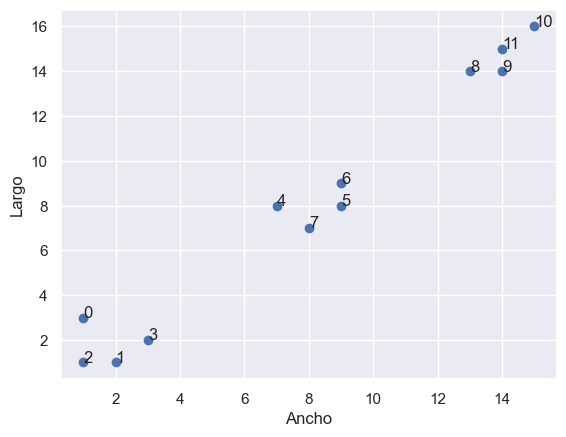

In [3]:
X = np.array([                             # creamos el toy dataset
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])
fig, ax = plt.subplots()                   # lo hacemos en un scatter plot
ax.scatter(X[:,0], X[:,1])
for i, txt in enumerate(range(X.shape[0])):# para anotar su indice a cada punto
    ax.annotate(txt, X[i])
plt.xlabel('Ancho')
plt.ylabel('Largo')

### Matriz de adyacencias

In [4]:
W_dist = pairwise_distances(X, metric= 'euclidean')
print(W_dist)

[[0.000 2.236 2.000 2.236 7.810 9.434 10.000 8.062 16.279 17.029 19.105
  17.692]
 [2.236 0.000 1.000 1.414 8.602 9.899 10.630 8.485 17.029 17.692 19.849
  18.439]
 [2.000 1.000 0.000 2.236 9.220 10.630 11.314 9.220 17.692 18.385 20.518
  19.105]
 [2.236 1.414 2.236 0.000 7.211 8.485 9.220 7.071 15.620 16.279 18.439
  17.029]
 [7.810 8.602 9.220 7.211 0.000 2.000 2.236 1.414 8.485 9.220 11.314
  9.899]
 [9.434 9.899 10.630 8.485 2.000 0.000 1.000 1.414 7.211 7.810 10.000
  8.602]
 [10.000 10.630 11.314 9.220 2.236 1.000 0.000 2.236 6.403 7.071 9.220
  7.810]
 [8.062 8.485 9.220 7.071 1.414 1.414 2.236 0.000 8.602 9.220 11.402
  10.000]
 [16.279 17.029 17.692 15.620 8.485 7.211 6.403 8.602 0.000 1.000 2.828
  1.414]
 [17.029 17.692 18.385 16.279 9.220 7.810 7.071 9.220 1.000 0.000 2.236
  1.000]
 [19.105 19.849 20.518 18.439 11.314 10.000 9.220 11.402 2.828 2.236
  0.000 1.414]
 [17.692 18.439 19.105 17.029 9.899 8.602 7.810 10.000 1.414 1.000 1.414
  0.000]]


In [5]:
print(X.shape)                # 12 muestras 2 caracteristicas
print(W_dist.shape)           # las distancias de las 12 muestras contra las 12 muestras

(12, 2)
(12, 12)


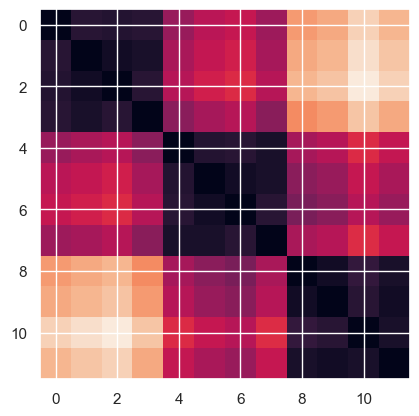

In [6]:
plt.imshow(W_dist)
plt.show()

#### Utilizamos el método del umbral en las distancias

UMBRAL = 5

In [7]:
# construimos la  matriz de adyacencia o afinidad

W_ad = np.zeros_like(W_dist, np.uint8)
W_ad[W_dist < 5] = 1
print(W_ad)

[[1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]]


### Visualizamos el grafo

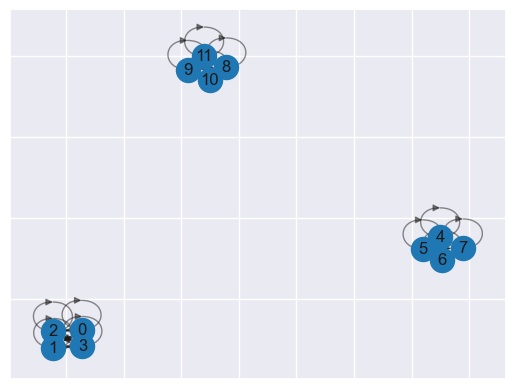

In [15]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    
G = nx.DiGraph(np.array(W_ad))
draw_graph(G)

`networkx` también nos permite calcular la matriz de afinidad a partir del grafo. Vamos a ver como:

In [16]:
W_ad = nx.adjacency_matrix(G)       # devuelve una sparse matrix
print(W_ad)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	1
  (4, 4)	1
  (4, 5)	1
  (4, 6)	1
  (4, 7)	1
  (5, 4)	1
  (5, 5)	1
  (5, 6)	1
  (5, 7)	1
  (6, 4)	1
  (6, 5)	1
  (6, 6)	1
  (6, 7)	1
  (7, 4)	1
  (7, 5)	1
  (7, 6)	1
  (7, 7)	1
  (8, 8)	1
  (8, 9)	1
  (8, 10)	1
  (8, 11)	1
  (9, 8)	1
  (9, 9)	1
  (9, 10)	1
  (9, 11)	1
  (10, 8)	1
  (10, 9)	1
  (10, 10)	1
  (10, 11)	1
  (11, 8)	1
  (11, 9)	1
  (11, 10)	1
  (11, 11)	1


In [17]:
print(W_ad.todense())    # para volver al formato original

[[1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]]


### Matriz laplaciana

In [18]:
# se calcula la matriz de grado

D = np.diag(np.sum(W_ad.todense(), axis= 1))
print('Matriz de grado:\n', D)

Matriz de grado:
 [[4 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 4]]


In [19]:
# la matriz laplaciana
L = D-W_ad
print('Matriz Laplaciana: \n', L)

Matriz Laplaciana: 
 [[ 3 -1 -1 -1  0  0  0  0  0  0  0  0]
 [-1  3 -1 -1  0  0  0  0  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0  0  0  0]
 [-1 -1 -1  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 -1 -1 -1  0  0  0  0]
 [ 0  0  0  0 -1  3 -1 -1  0  0  0  0]
 [ 0  0  0  0 -1 -1  3 -1  0  0  0  0]
 [ 0  0  0  0 -1 -1 -1  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0 -1  3 -1 -1]
 [ 0  0  0  0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0  0  0  0 -1 -1 -1  3]]


Una de las propiedades más importantes de la matriz laplaciana es: 

**Si el grafo w tiene K componentes conexos, entonces L tiene k vectores propios (eigenvectors) con valor propio igual a 0 (eigenvalue)**

In [20]:
e, v = np.linalg.eig(L)

print('eigenvalues')
print(e)               # eigenvalues
print('\n')

print('eigenvectors')
print(v)               # eigenvectors
print(v.shape)

eigenvalues
[4.000 -0.000 4.000 4.000 4.000 -0.000 4.000 4.000 4.000 -0.000 4.000
 4.000]


eigenvectors
[[0.866 -0.500 -0.095 0.227 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000]
 [-0.289 -0.500 0.843 -0.325 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000]
 [-0.289 -0.500 -0.374 -0.598 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000]
 [-0.289 -0.500 -0.374 0.696 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000]
 [0.000 0.000 0.000 0.000 0.866 -0.500 -0.095 0.227 0.000 0.000 0.000
  0.000]
 [0.000 0.000 0.000 0.000 -0.289 -0.500 0.843 -0.325 0.000 0.000 0.000
  0.000]
 [0.000 0.000 0.000 0.000 -0.289 -0.500 -0.374 -0.598 0.000 0.000 0.000
  0.000]
 [0.000 0.000 0.000 0.000 -0.289 -0.500 -0.374 0.696 0.000 0.000 0.000
  0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.866 -0.500 -0.095
  0.227]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 0.843
  -0.325]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 -0.374
  -0.598]
 [0.000 0.000 0

#### Visualizando los autovalores

Si nos fijamos en las gráficas de los 3 primeros vectores propios de la matriz L (cuyos valores propios son 0), podemos ver cómo nos permiten separar correctamente los 3 clusters de nuestro dataset trazando una línea horizontal.

Esto es buena señal, nos indica que con esta nueva representación de los datos, un algoritmo de clustering podrá separarlos correctamente.

Vamos a comprobar si es cierto:

Tenemos 3 componentes conexos en nuestro dataset.


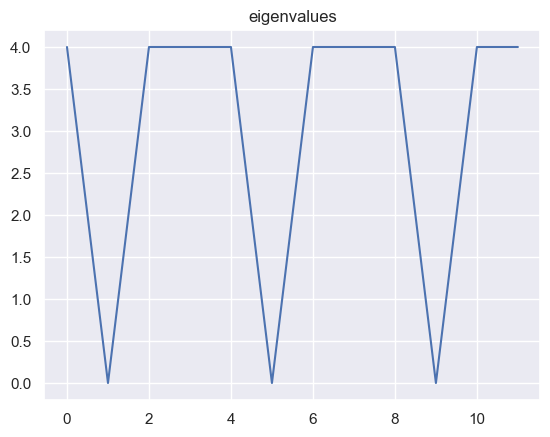

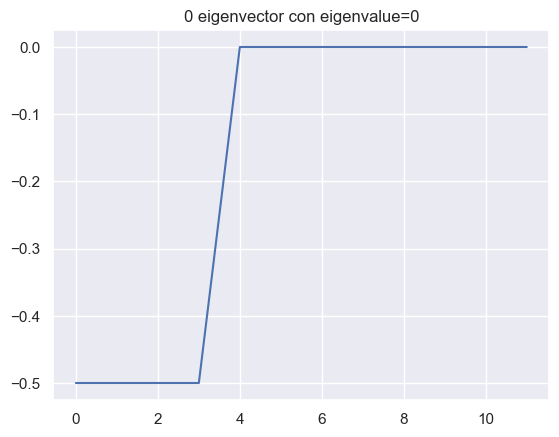

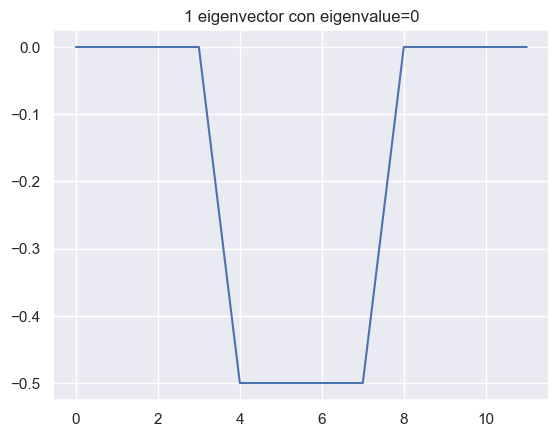

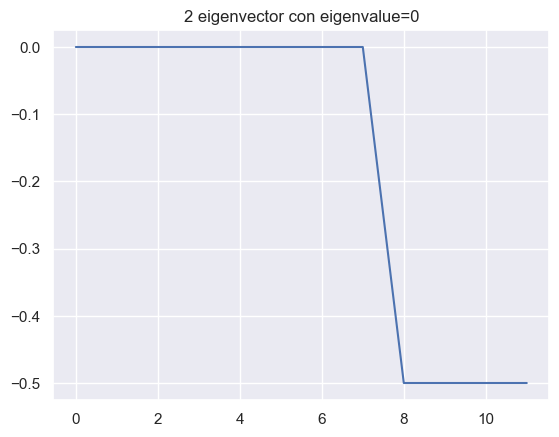

In [21]:
plt.figure()
plt.plot(e)
plt.title('eigenvalues')

eigen_0 = np.where(e < 10e-6)[0]
print(f'Tenemos {len(eigen_0)} componentes conexos en nuestro dataset.')
for n, i in enumerate(eigen_0):
    plt.figure()
    plt.plot(v[:, i])
    plt.title(f'{n} eigenvector con eigenvalue=0')
    
# muestra los autovalores des ordenados 

In [22]:
print(eigen_0)

[1 5 9]


In [23]:
from sklearn.cluster import KMeans

In [24]:
vectors_propios_a_utilizar= eigen_0

X_new = np.array(v[:, vectors_propios_a_utilizar])
print(X_new.shape)

km = KMeans(init= 'k-means++', n_clusters= len(eigen_0))
km.fit(X_new)
km.labels_

(12, 3)


C:\Users\plane\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0])

## Un ejemplo un poco más complicado

(1000, 2)


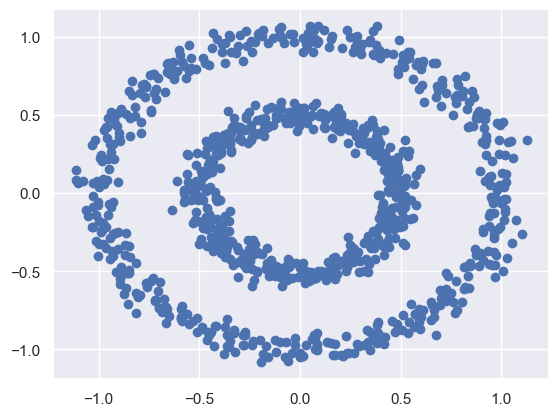

In [25]:
X, clusters = make_circles(n_samples=1000, noise=.05, factor=.5, random_state=0) # generamos los nuevo datos 'DONUT'
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

C:\Users\plane\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[0.087 -0.471]
 [-0.087 0.473]]


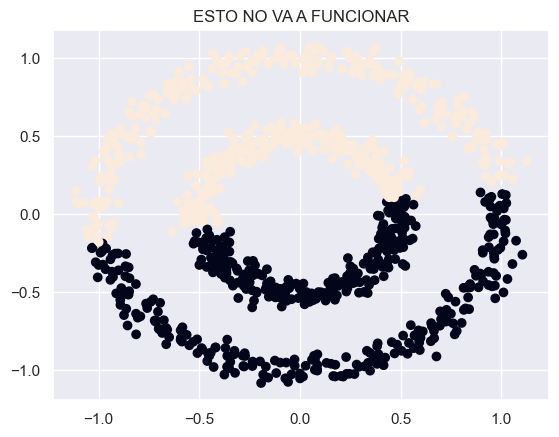

In [26]:
km = KMeans(n_clusters=2, init= 'k-means++', random_state= 0)
km_clustering = km.fit(X)
print(km.cluster_centers_)
#print(km.labels_)
plt.title('ESTO NO VA A FUNCIONAR')
plt.scatter(X[:, 0], X[:, 1], c= km_clustering.labels_)
plt.show()

k-means no es capaz de hacer el agrupamiento de forma correcta.

necesitamos:

-   la obtención de la matriz de adyacencias o afinidad,
-   la obtención de la matriz Laplaciana,
-   el cálculo de los vectores y valores propios de esta última,
-   transformación de los datos en el nuevo espacio
-   y el clustering mediante K-means (u otra técnica tradicional).


### Matriz de adyacencias

In [27]:
W_dist = pairwise_distances(X, metric= 'euclidean')
print(W_dist.shape)
print('matriz de distancias\n')
print(W_dist)

(1000, 1000)
matriz de distancias

[[0.000 0.705 1.474 ... 0.673 0.356 0.955]
 [0.705 0.000 0.786 ... 0.818 0.869 0.820]
 [1.474 0.786 0.000 ... 1.323 1.553 1.094]
 ...
 [0.673 0.818 1.323 ... 0.000 0.417 0.359]
 [0.356 0.869 1.553 ... 0.417 0.000 0.764]
 [0.955 0.820 1.094 ... 0.359 0.764 0.000]]


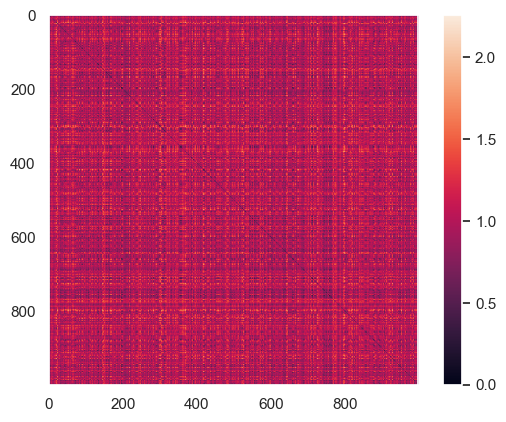

In [28]:
plt.imshow(W_dist)
plt.grid(False)
plt.colorbar()
plt.show()

#### Utilizamos el método del umbral en las distancias

UMBRAL = 0.5

In [29]:
W_ad = np.zeros_like(W_dist, np.uint8)
W_ad[W_dist < 0.5] = 1
print('Matriz de adyacencias:\n', W_ad)

Matriz de adyacencias:
 [[1 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [1 0 0 ... 1 1 0]
 [0 0 0 ... 1 0 1]]


In [30]:
# Matriz de grado

W_ad = np.float32(W_ad)
D = np.float32(np.diag(np.sum(W_ad, axis= 1)))
print('Matriz diagonal de grados: \n', D)

Matriz diagonal de grados: 
 [[191.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 184.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 86.000 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 182.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 189.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 183.000]]


### Matriz Laplaciana

In [31]:
L = D-W_ad
print('Matriz Laplaciana:\n', L)

Matriz Laplaciana:
 [[190.000 0.000 0.000 ... 0.000 -1.000 0.000]
 [0.000 183.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 85.000 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 181.000 -1.000 -1.000]
 [-1.000 0.000 0.000 ... -1.000 188.000 0.000]
 [0.000 0.000 0.000 ... -1.000 0.000 182.000]]


### Autovalores y autovectores

In [32]:
e, v = np.linalg.eig(L)

print('Eigenvalues:\n', e)
print()
print('Eigenvectors:\n', v)

Eigenvalues:
 [-0.000 12.222 12.412 26.820 27.531 35.288 40.850 42.336 52.579 53.982
 55.610 57.002 228.394 226.832 224.610 220.337 216.050 214.912 66.833
 67.871 69.281 211.889 70.410 211.307 71.324 210.453 210.154 71.859
 209.721 72.405 72.974 208.985 208.787 73.168 73.256 73.389 73.484 208.317
 73.712 73.920 208.052 208.128 74.107 74.235 207.519 207.509 207.126
 74.579 75.000 75.170 75.116 206.939 206.642 147.503 148.684 151.988
 75.597 206.638 149.530 150.111 153.011 151.522 206.337 75.930 75.948
 76.146 76.226 206.156 206.125 206.066 76.418 76.457 76.570 76.745 205.788
 205.666 205.564 205.497 205.407 205.189 205.029 205.037 204.823 204.705
 204.455 204.564 204.411 204.137 204.083 204.004 203.811 203.633 203.447
 203.275 203.186 203.023 203.132 202.570 202.537 202.641 202.875 202.794
 202.826 76.660 77.032 77.182 77.230 77.349 77.464 77.580 78.333 78.244
 78.124 77.717 77.752 77.830 158.011 156.888 77.920 155.308 154.446
 153.945 153.795 77.964 77.938 148.856 147.163 146.491 146.2

### Visualizando los autovalores

Tenemos 1 componentes conexos en nuestro dataset, el resto no esta nada claro, incluso sabiendo a priori que hay dos clusters.


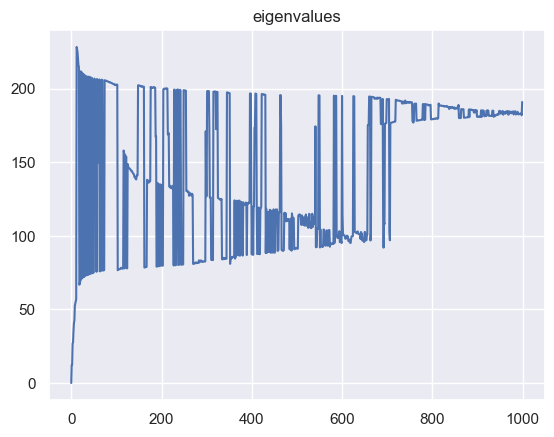

In [33]:
plt.figure()
plt.plot(e)
plt.title('eigenvalues')

eigen_0 = np.isclose(e, 0, atol=1e-3)
print(f'Tenemos {sum(eigen_0)} componentes conexos en nuestro dataset, el resto no esta \
nada claro, incluso sabiendo a priori que hay dos clusters.')

### Probando con la matriz laplaciana simétrica

Un grafico bueno seria que nosotros pudieramos separar linealmente los datos del gráfico del 0 eigenvector, eigenvalue = 0 ...

In [34]:
# calculamos la laplaciana normalizada simétrica
D = np.sum(W_ad, axis=1)
D = D**(-1./2)
I = np.diag(np.ones(D.size))
D = np.diag(D)
L = I-D.dot(W_ad).dot(D)

# calculamos autovectores y autovalores
e, v = np.linalg.eig(L)
e = e.real
v = v.real

Tenemos 3 componentes conexos en nuestro dataset.


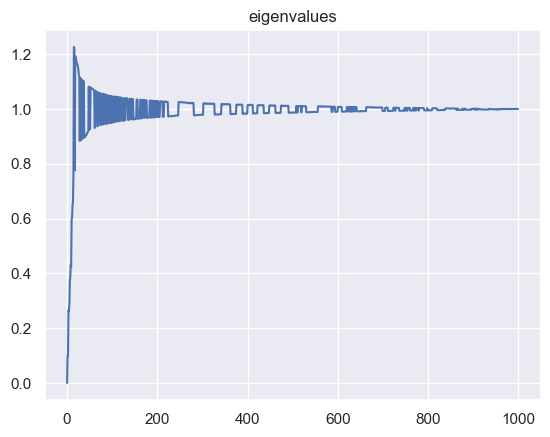

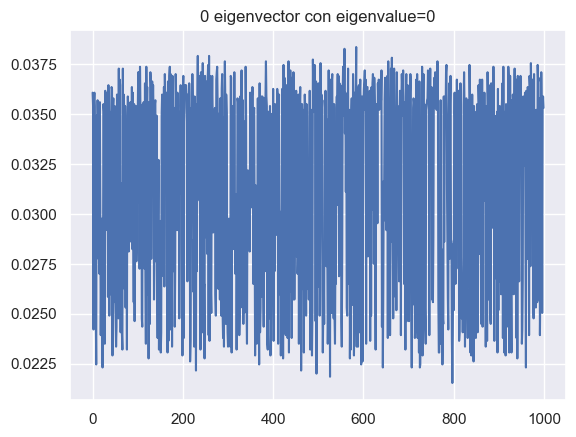

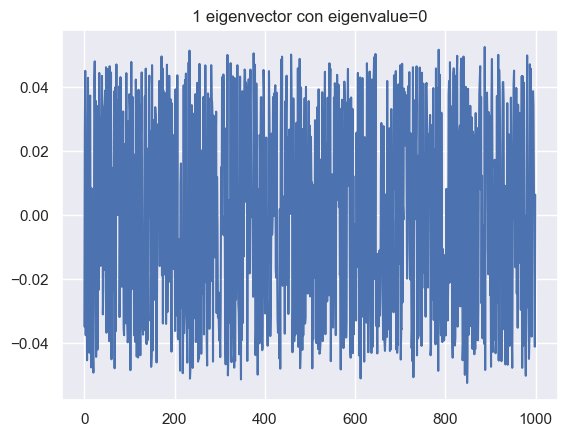

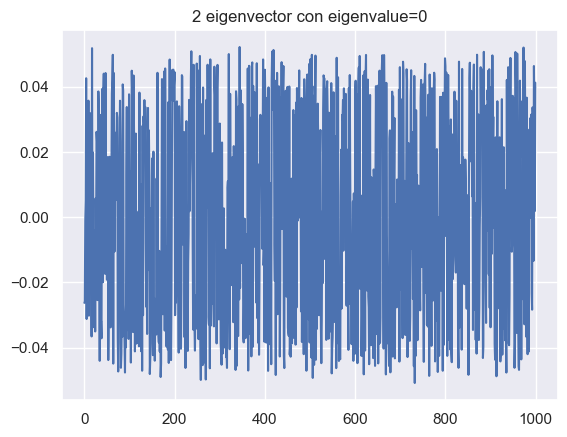

In [35]:
plt.figure()
plt.plot(e)
plt.title('eigenvalues')

eigen_0 = np.where(np.isclose(e, 0, atol=1e-1))[0]
print(f'Tenemos {len(eigen_0)} componentes conexos en nuestro dataset.')
for n, i in enumerate(eigen_0):
    plt.figure()
    plt.plot(v[:, i])
    plt.title(f'{n} eigenvector con eigenvalue=0')

In [36]:
print(eigen_0)

[0 1 2]


In [37]:
vectores_propios_a_utilizar = eigen_0
print(vectores_propios_a_utilizar)
Xnew = np.array(v[:, vectores_propios_a_utilizar])
km = KMeans(init='k-means++', n_clusters=2, n_init= 'auto')
km.fit(Xnew)

[0 1 2]


KMeans(n_clusters=2, n_init='auto')

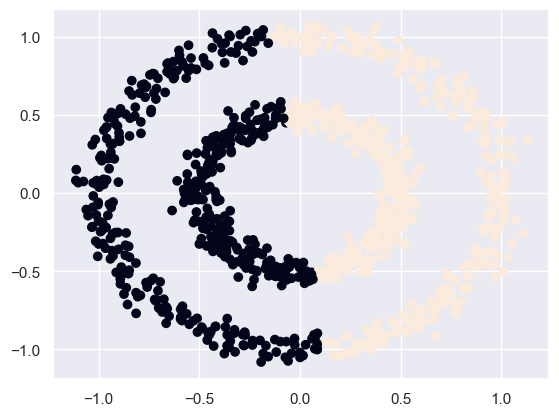

In [38]:
plt.scatter(X[:, 0], X[:, 1], c= km.labels_)
plt.show()

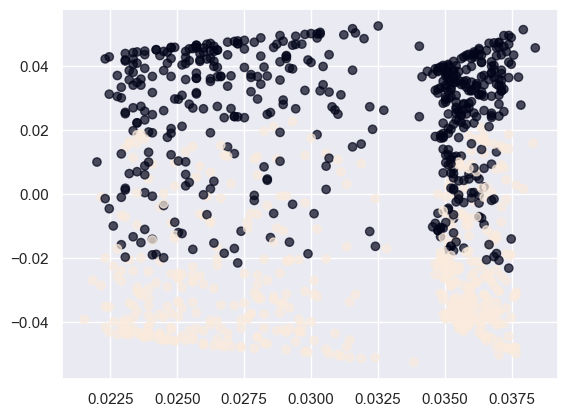

In [39]:
# veamos el dataset proyectado usando los 3 vectores propios escogidos
fig, ax = plt.subplots()
ax.scatter(Xnew[:,0], Xnew[:,1], c=km.labels_, alpha=0.7)
plt.show()

### Implementando KNN para construiri el gráfico

La implementación de la matriz laplaciana no da buen resultado, por lo tanto se procederá a contruir un grafo mediante el método KNN

In [40]:
def matriz_afinidad_KNN(mSimilitud, KNN=5):
    auxM = mSimilitud.copy()
    np.fill_diagonal(auxM, 0)

    # Construimos la matriz afinidad de A a B
    mAfinidadA = np.zeros(auxM.shape)
    # utilizamos la matriz similitud para ordenar los vecinos de cada nodo por cercanía
    # `np.argsort` nos devuelve los índices que ordenan el array introducido (de forma ascendente)
    # en este caso, al tener la matriz similitud, tenemos que hacerla negativa, para que nos
    # devuelva primero los más similares (que al ponerle el - a la matriz de similitud, son los
    # valores más pequeños)
    # Flatten simplemente lo utilizamos para convertir la matriz `KNN x n`en un vector de 1x(KNN x n)
    indices_kNN_nodo_fila = np.argsort(-auxM, axis=0)[0:KNN, :].flatten()
    # Nos creamos un array para combinar con el anterior y poder indexar los
    # elementos pertinentes de la matriz de afinidad
    indices_kNN_nodo_col = np.tile(np.arange(auxM.shape[0]), KNN)
    mAfinidadA[indices_kNN_nodo_fila, indices_kNN_nodo_col] = 1
    np.fill_diagonal(mAfinidadA, 1)

    # Y ahora hacemos lo mismo de B a A
    mAfinidadB = np.zeros(auxM.shape)
    # Fijaos que en este caso la matriz va a ser `n x KNN` (hacemos el argsort en la dirección columnas: -->)
    indices_kNN_nodo_fila = np.repeat(np.arange(auxM.shape[0]), KNN)
    indices_kNN_nodo_col = np.argsort(-auxM, axis=1)[:, 0:KNN].flatten()
    mAfinidadB[indices_kNN_nodo_fila, indices_kNN_nodo_col] = 1
    np.fill_diagonal(mAfinidadB, 1)

    return (mAfinidadA + mAfinidadB) / 2

In [41]:
# calculamos de nuevo la matriz de adyacencia (o afinidad), esta vez siguiendo el enfoque de los kNN
sigma = 0.1
W_sim = np.exp(-np.power(W_dist,2)/(2*sigma**2))
W_ad = matriz_afinidad_KNN(W_sim)
print(W_ad)

[[1.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 1.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 1.000 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 1.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 1.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 1.000]]


In [42]:
# calculamos la laplaciana normalizada simétrica
D = np.sum(W_ad,axis=1)
D = D**(-1./2)
I = np.diag(np.ones(D.size))
D = np.diag(D)
L = I - D.dot(W_ad).dot(D)


In [43]:
# calculamos autovectores y autovalores
e, v = np.linalg.eig(L)

Tenemos 2 componentes conexos en nuestro dataset.


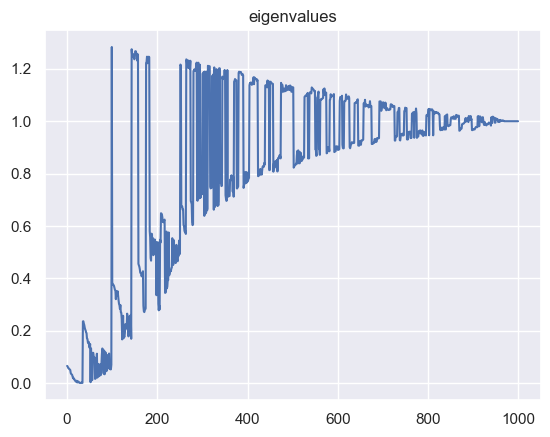

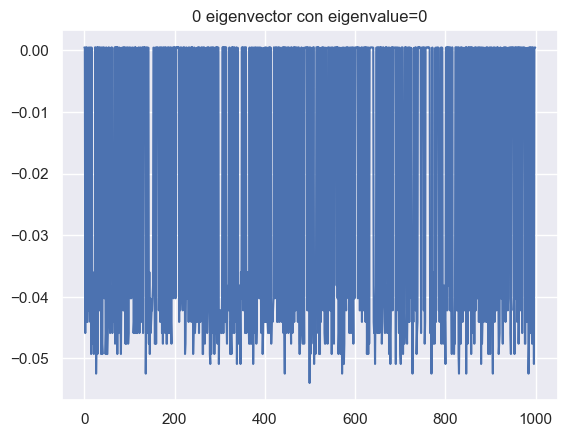

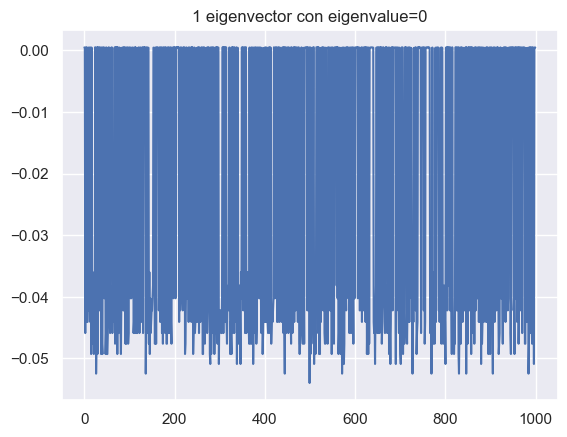

In [46]:
plt.figure()
plt.plot(e)
plt.title('eigenvalues')

# Ahora se puede observar como son linealmente separables
eigen_0 = np.where(np.isclose(e, 0, atol=1e-5))[0]
print(f'Tenemos {len(eigen_0)} componentes conexos en nuestro dataset.')
for n, i in enumerate(eigen_0):
    plt.figure()
    plt.plot(v[:, i])
    plt.title(f'{n} eigenvector con eigenvalue=0')

In [48]:
vectores_propios_a_utilizar = eigen_0
print(vectores_propios_a_utilizar)
Xnew = np.float32(np.array(v[:, vectores_propios_a_utilizar]))
print(Xnew)

[29 30]
[[0.000 0.000]
 [0.000 0.000]
 [-0.046 -0.046]
 ...
 [0.000 0.000]
 [0.000 0.000]
 [0.000 0.000]]


C:\Users\plane\AppData\Local\Temp\ipykernel_816\1482034199.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  Xnew = np.float32(np.array(v[:, vectores_propios_a_utilizar]))


In [50]:
km = KMeans(n_clusters=2, init= 'k-means++', n_init= 'auto')
km.fit(Xnew)

KMeans(n_clusters=2, n_init='auto')

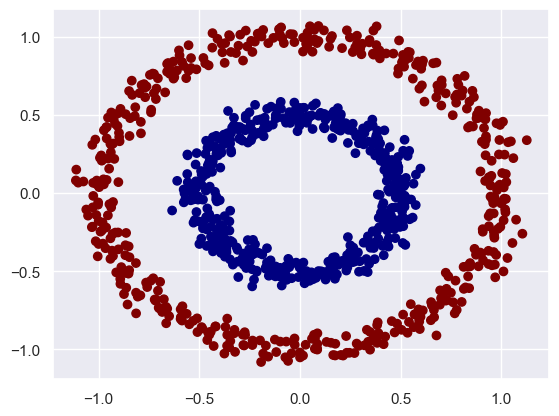

In [51]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=km.labels_, cmap='jet')
plt.show()

Cuando hemos construido la $W_{ad}$ mediante el método del umbral, nos hemos inventado completamente dicho umbral.

Esto no quiere decir que no exista un umbral para el cual no funcione correctamente el clustering siguiendo ese enfoque, lo que quiere decir es que si no conocemos el umbral, es posiblemente más sencillo seguir el enfoque de los kNN.

Vamos a ver los datos en su nuevo espacio:

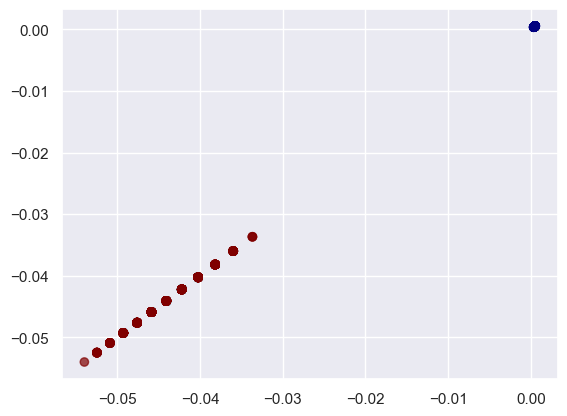

In [52]:
# veamos el dataset proyectado usando los 2 vectores propios escogidos
fig, ax = plt.subplots()
ax.scatter(Xnew[:,0], Xnew[:,1], c=km.labels_, alpha=0.7, cmap='jet')
plt.show()

## Espectral clustering con sklearn

**Init signature:**

SpectralClustering(

    n_clusters=8,
    *,
    eigen_solver=None,
    n_components=None,
    random_state=None,
    n_init=10,
     gamma=1.0,
    affinity='rbf',
    n_neighbors=10,
    eigen_tol='auto',
    assign_labels='kmeans',
    degree=3,
    coef0=1,
    kernel_params=None,
    n_jobs=None,
    verbose=False,
)
**Docstring:**

Apply clustering to a projection of the normalized Laplacian.

In practice Spectral Clustering is very useful when the structure of
the individual clusters is highly non-convex, or more generally when
a measure of the center and spread of the cluster is not a suitable
description of the complete cluster, such as when clusters are
nested circles on the 2D plane.

If the affinity matrix is the adjacency matrix of a graph, this method
can be used to find normalized graph cuts [1]_, [2]_.

When calling ``fit``, an affinity matrix is constructed using either
a kernel function such the Gaussian (aka RBF) kernel with Euclidean
distance ``d(X, X)``::

        np.exp(-gamma * d(X,X) ** 2)

or a k-nearest neighbors connectivity matrix.

Alternatively, a user-provided affinity matrix can be specified by
setting ``affinity='precomputed'``.

Read more in the :ref:`User Guide <spectral_clustering>`.

Parameters
----------
**n_clusters** : int, default=8

    The dimension of the projection subspace.

**eigen_solver** : {'arpack', 'lobpcg', 'amg'}, default=None

    The eigenvalue decomposition strategy to use. AMG requires pyamg
    to be installed. It can be faster on very large, sparse problems,
    but may also lead to instabilities. If None, then ``'arpack'`` is
    used. See [4]_ for more details regarding `'lobpcg'`.

**n_components** : int, default=None

    Number of eigenvectors to use for the spectral embedding. If None,
    defaults to `n_clusters`.

**random_state** : int, RandomState instance, default=None

**n_init : int, default=10**

    Number of time the k-means algorithm will be run with different
    centroid seeds. The final results will be the best output of n_init
    consecutive runs in terms of inertia. Only used if
    ``assign_labels='kmeans'``.

**gamma** : float, default=1.0
    Kernel coefficient for rbf, poly, sigmoid, laplacian and chi2 kernels.
    Ignored for ``affinity='nearest_neighbors'``.

**affinity** : str or callable, default='rbf'

    How to construct the affinity matrix.
     - 'nearest_neighbors': construct the affinity matrix by computing a
       graph of nearest neighbors.
     - 'rbf': construct the affinity matrix using a radial basis function
       (RBF) kernel.
     - 'precomputed': interpret ``X`` as a precomputed affinity matrix,
       where larger values indicate greater similarity between instances.
     - 'precomputed_nearest_neighbors': interpret ``X`` as a sparse graph
       of precomputed distances, and construct a binary affinity matrix
       from the ``n_neighbors`` nearest neighbors of each instance.
     - one of the kernels supported by
       :func:`~sklearn.metrics.pairwise.pairwise_kernels`.

    Only kernels that produce similarity scores (non-negative values that
    increase with similarity) should be used. This property is not checked
    by the clustering algorithm.

**n_neighbors** : int, default=10

    Number of neighbors to use when constructing the affinity matrix using
    the nearest neighbors method. Ignored for ``affinity='rbf'``.

**eigen_tol** : float, default="auto"

    Stopping criterion for eigen decomposition of the Laplacian matrix.
    If `eigen_tol="auto"` then the passed tolerance will depend on the
    `eigen_solver`:

    - If `eigen_solver="arpack"`, then `eigen_tol=0.0`;
    - If `eigen_solver="lobpcg"` or `eigen_solver="amg"`, then
      `eigen_tol=None` which configures the underlying `lobpcg` solver to
      automatically resolve the value according to their heuristics. See,
      :func:`scipy.sparse.linalg.lobpcg` for details.

**assign_labels** : {'kmeans', 'discretize', 'cluster_qr'}, default='kmeans'

    The strategy for assigning labels in the embedding space. There are two
    ways to assign labels after the Laplacian embedding. k-means is a
    popular choice, but it can be sensitive to initialization.
    Discretization is another approach which is less sensitive to random
    initialization [3]_.
    The cluster_qr method [5]_ directly extract clusters from eigenvectors
    in spectral clustering. In contrast to k-means and discretization, cluster_qr
    has no tuning parameters and runs no iterations, yet may outperform
    k-means and discretization in terms of both quality and speed.

**degree** : float, default=3
    Degree of the polynomial kernel. Ignored by other kernels.

**coef0** : float, default=1
    Zero coefficient for polynomial and sigmoid kernels.
    Ignored by other kernels.

**kernel_params** : dict of str to any, default=None
    Parameters (keyword arguments) and values for kernel passed as
    callable object. Ignored by other kernels.

**n_jobs** : int, default=None
    The number of parallel jobs to run when `affinity='nearest_neighbors'`
    or `affinity='precomputed_nearest_neighbors'`. The neighbors search
    will be done in parallel.
    ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
    for more details.

**verbose** : bool, default=False
    Verbosity mode.


Attributes
----------
**affinity_matrix_** : array-like of shape (n_samples, n_samples)

    Affinity matrix used for clustering. Available only after calling
    ``fit``.

**labels_** : ndarray of shape (n_samples,)
    Labels of each point

**n_features_in_** : int

    Number of features seen during :term:`fit`.


**feature_names_in_** : ndarray of shape (`n_features_in_`,)

    Names of features seen during :term:`fit`. Defined only when `X`
    has feature names that are all strings.

C:\Users\plane\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


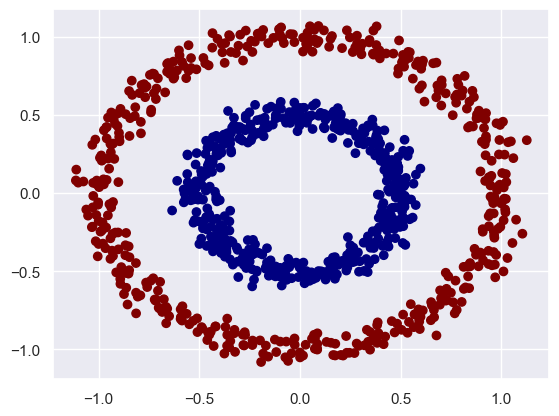

In [53]:
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)
sc_clustering = sc.fit(X)
plt.scatter(X[:,0], X[:,1], c=sc_clustering.labels_, cmap='jet')
plt.show()